# Домашнее задание «Сегментация и детекция объектов»

Распознавание рукописного ввода на примере базы MNIST
Построить классификатор изображений рукописного ввода на базе MNIST. В качестве
шаблона в данной работе можно использовать ipython-ноутбук [002-digit.ipynb](https://github.com/a4tunado/lectures/blob/master/002/002-digit.ipynb).
Классификатор предлагается строить на признаках, полученных в результате предобработки
изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования.
В качестве модели классификатора можно использовать любую известную Вам модель, за
исключением сверточных нейронных сетей.
Критерием качества классификатора является метрика accuracy. Для получения зачета по
данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на
тестовой выборке в рамках контеста [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) на Kaggle.
Решение необходимо предоставить в виде ipython-ноутбука с реализацией процесса
построения модели и скриншота с финальным результатом на Kaggle.

## Загрузка бибилотек

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import warnings

## Загрузка данных

In [7]:
digit_train_data = pd.read_csv('train.csv')
digit_test_data = pd.read_csv('test.csv')

## Определение признаков и целевой переменной

In [9]:
X = digit_train_data.drop('label', axis=1).to_numpy()
y = digit_train_data['label'].copy().to_numpy()

## Определение выборки на обучающую и тестовую выборку

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

## Визуализация исходных данных

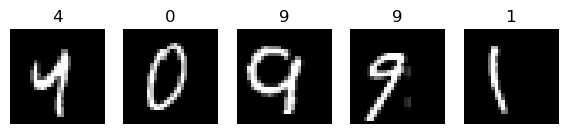

In [13]:
# приводим размерность к удобному для обработки виду
train_img = np.resize(X_train[:, 1:], (X_train.shape[0], 28, 28))

fig = plt.figure(figsize=(10, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray')
    subplot.set_title('%s' % y_train[i-1])
    plt.axis('off')

## Обучение модели с помощью опорных векторов

In [15]:
# создадим объект классификатора (Support Vector Classifier) из модуля SVM
svc_model = svm.SVC()

In [16]:
# обучим классификатор с помощью метода fit()
svc_model.fit(X_train, y_train)

SVC()

In [17]:
# сделаем прогноз того, что представлено на картинке
y_pred = svc_model.predict(X_test)

## Оценка качества

In [19]:
# общая точность
print("Accuracy:", np.round(metrics.accuracy_score(y_test, y_pred), 2))

Accuracy: 0.97


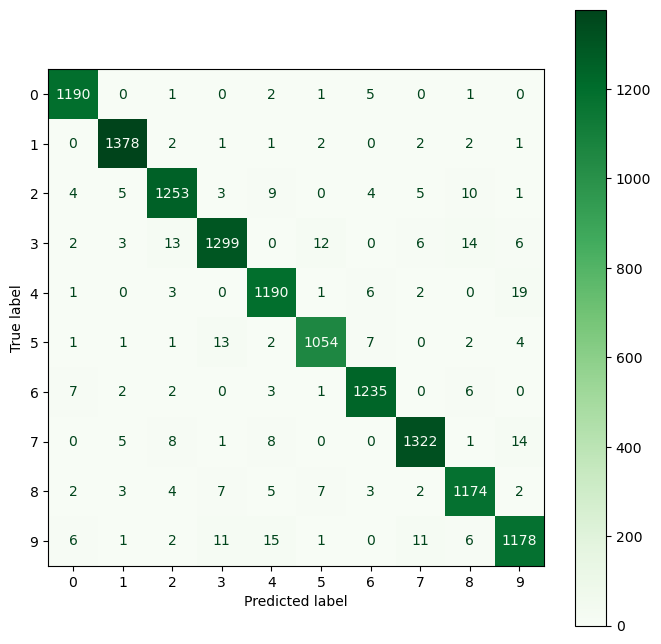

In [20]:
# точность покаждой целевой переменной

# создадим пространство нужного размера для матрицы
fig, ax = plt.subplots(figsize = (8, 8))

metrics.ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test, cmap = plt.cm.Greens, ax = ax)

# Формирование файла для проверки в Каггл

In [22]:
warnings.filterwarnings('ignore')

with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(svc_model.predict(digit_test_data), 1):
        dst.write('%s,%s\n' % (i, p))

# Загрузка скриншота с Каггла

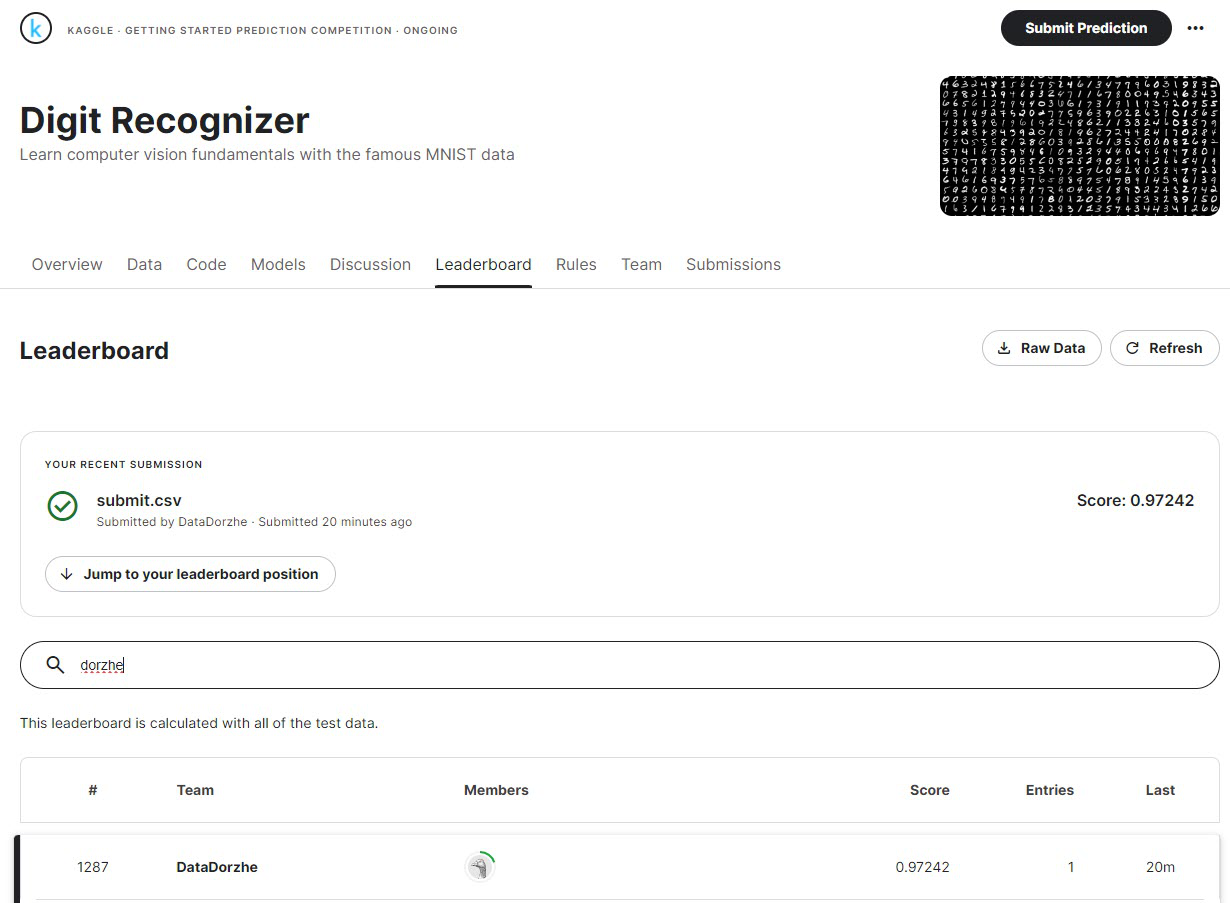

In [24]:
from PIL import Image
Image.open('DataDorzhe_Digit_Score.jpg')